In [114]:
#importing required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
# Merging the Multiple dataset
df = pd.concat(map(pd.read_csv, ['/content/US_Accidents_Dec20_Updated_sheet1.csv', '/content/assng2_dataset - Sheet1.csv','/content/assng2_dataset - Sheet2.csv','/content/assng2_dataset - Sheet3.csv','/content/assng2_dataset - sheet4.csv']), ignore_index=True)

In [116]:
#Top 5 rows
df.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,2,21-05-19 8:29,21-05-19 9:29,34.8089,-82.2692,34.8089,-82.2692,0,Accident on Tanner Rd at Pennbrooke Ln.,439,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,21-05-19 8:53,76,76,52,28.91,10,N,7,0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,2,07-10-19 17:43,07-10-19 19:42,35.0901,-80.7456,35.0901,-80.7456,0,Accident on Houston Branch Rd at Providence Br...,3299,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,07-10-19 17:53,76,76,62,29.3,10,VAR,3,0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,2,13-12-20 21:53,13-12-20 22:44,37.1457,-121.985,37.1658,-121.988,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,13-12-20 21:53,51,51,80,30.17,10,W,6,0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,2,17-04-18 16:51,17-04-18 17:50,39.1104,-119.774,39.1104,-119.774,0,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,17-04-18 16:55,53.6,NaN,16,30.16,10,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,3,31-08-16 17:40,31-08-16 18:10,26.1029,-80.2651,26.1029,-80.2651,0,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,31-08-16 17:53,84.2,NaN,84,29.92,10,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [117]:
#Bottom 5 eors
df.tail()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
23632,4,10-08-17 9:02,10-08-17 15:02,42.476653,-88.156008,42.476124,-88.152768,0.169,Closed at Salem - Road closed due to accident.,26776,W IL Route 173,L,Antioch,Lake,IL,60002-9298,US,US/Central,KENW,10-08-17 8:53,66.9,NaN,81,30.08,10,SSW,8.1,0.02,Overcast,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,Day,Day,Day,Day
23633,2,04-12-20 0:34,04-12-20 1:53,33.901609,-117.467397,33.893929,-117.501987,2.053,SR91 W WO MAGNOLIA AVE. [Notification] [FSP]-P...,NaN,CA-91 W,R,Riverside,Riverside,CA,92505,US,US/Pacific,KRAL,04-12-20 0:53,48,44,22,29.36,10,NNE,8,0,Fair,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,Night,Night,Night,Night
23634,2,18-10-20 9:43,18-10-20 10:58,29.635888,-95.164979,29.630178,-95.171069,0.538,Incident on E SAM HOUSTON TOLLWAY SB near GENO...,NaN,E Sam Houston Tollway S,R,Pasadena,Harris,TX,77505,US,US/Central,KEFD,18-10-20 9:50,81,81,79,30,10,SE,10,NaN,Fair,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,Day,Day,Day,Day
23635,2,27-02-20 8:50,27-02-20 11:10,30.366779,-85.438271,30.366779,-85.438271,0,Right hand shoulder blocked due to accident on...,12199,Jadewood Cir,R,Youngstown,Bay,FL,32466,US,US/Eastern,KECP,27-02-20 8:53,42,34,60,30.18,10,NW,16,0,Fair,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,Day,Day,Day,Day
23636,2,06-05-19 4:09,06-05-19 4:39,29.727739,-95.441391,29.727739,-95.441391,0,Accident on Weslayan St at Westpark Dr.,4913,Weslayan St,L,Houston,Harris,TX,77027-7407,US,US/Central,KMCJ,06-05-19 3:53,67,67,87,29.85,10,CALM,0,0,Mostly Cloudy,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,Night,Night,Night,Night


In [118]:
df.describe()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
count,23637,23637,23637,23637,23637,21324,21324.000000,23637,23637,8209,23637,23637,23636,23637,23637,23628,23637,23613,23581,23293,23132,14027,23100,23212,23097,23161,21251,13160,23081,23637,23637,23637,23637,23637,23637,23637,23637,23637,23637,23637,23637,23637,23636,23636,23636,23636
unique,9,23247,23363,23091,23093,20886,20892.000000,3747,22067,5450,10055,3,3569,881,50,11621,2,5,1219,20980,780,834,197,1070,76,25,120,106,59,5,4,5,5,5,5,5,3,5,5,5,5,3,3,3,3,3
top,2,11:00.0,45:00.0,40.850067,-117.833716,41.83617,-82.474419,0,A crash has occurred causing no to minimum del...,2,I-95 N,R,Houston,Los Angeles,CA,91761,US,US/Eastern,KCQT,04-11-20 15:53,63,63,100,30.01,10,CALM,0,0,Fair,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,Day,Day,Day,Day
freq,9997,7,6,4,4,3,3.000000,7159,20,50,309,19619,573,1933,5924,40,23634,9925,375,6,297,185,528,275,10633,2289,1302,6595,5545,13488,13633,12613,13582,12268,13618,13529,13634,13361,13423,13629,11511,13634,15905,17016,18131,19013


In [119]:
#Checking for Missing values or Null values
df.isnull().sum()

Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
End_Lat                   2313
End_Lng                   2313
Distance(mi)                 0
Description                  0
Number                   15428
Street                       0
Side                         0
City                         1
County                       0
State                        0
Zipcode                      9
Country                      0
Timezone                    24
Airport_Code                56
Weather_Timestamp          344
Temperature(F)             505
Wind_Chill(F)             9610
Humidity(%)                537
Pressure(in)               425
Visibility(mi)             540
Wind_Direction             476
Wind_Speed(mph)           2386
Precipitation(in)        10477
Weather_Condition          556
Amenity                      0
Bump                         0
Crossing                     0
Give_Way

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23637 entries, 0 to 23636
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Severity               23637 non-null  object
 1   Start_Time             23637 non-null  object
 2   End_Time               23637 non-null  object
 3   Start_Lat              23637 non-null  object
 4   Start_Lng              23637 non-null  object
 5   End_Lat                21324 non-null  object
 6   End_Lng                21324 non-null  object
 7   Distance(mi)           23637 non-null  object
 8   Description            23637 non-null  object
 9   Number                 8209 non-null   object
 10  Street                 23637 non-null  object
 11  Side                   23637 non-null  object
 12  City                   23636 non-null  object
 13  County                 23637 non-null  object
 14  State                  23637 non-null  object
 15  Zipcode            

In [121]:
#Checking Datatypes of each features
df.dtypes

Severity                 object
Start_Time               object
End_Time                 object
Start_Lat                object
Start_Lng                object
End_Lat                  object
End_Lng                  object
Distance(mi)             object
Description              object
Number                   object
Street                   object
Side                     object
City                     object
County                   object
State                    object
Zipcode                  object
Country                  object
Timezone                 object
Airport_Code             object
Weather_Timestamp        object
Temperature(F)           object
Wind_Chill(F)            object
Humidity(%)              object
Pressure(in)             object
Visibility(mi)           object
Wind_Direction           object
Wind_Speed(mph)          object
Precipitation(in)        object
Weather_Condition        object
Amenity                  object
Bump                     object
Crossing

**Converting Object datatype into Date time datetype "Start_Time","End_Time" and "Weather_Timestamp" **

In [122]:
df.head(1)

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,2,21-05-19 8:29,21-05-19 9:29,34.8089,-82.2692,34.8089,-82.2692,0,Accident on Tanner Rd at Pennbrooke Ln.,439,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,21-05-19 8:53,76,76,52,28.91,10,N,7,0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [123]:
#Function for converting datatype "Object" into "Datetime"
def change_into_datetime(col):
  df[col]=pd.to_datetime(df[col], errors='coerce')

In [124]:
for i in ["Start_Time","End_Time","Weather_Timestamp"]:
  change_into_datetime(i)

In [125]:
df.dtypes

Severity                         object
Start_Time               datetime64[ns]
End_Time                 datetime64[ns]
Start_Lat                        object
Start_Lng                        object
End_Lat                          object
End_Lng                          object
Distance(mi)                     object
Description                      object
Number                           object
Street                           object
Side                             object
City                             object
County                           object
State                            object
Zipcode                          object
Country                          object
Timezone                         object
Airport_Code                     object
Weather_Timestamp        datetime64[ns]
Temperature(F)                   object
Wind_Chill(F)                    object
Humidity(%)                      object
Pressure(in)                     object
Visibility(mi)                   object


In [126]:
#Dealing with Start_Time column

def starttime(col):
  df["start_Day"]=df[col].dt.day
  df["start_Month"]=df[col].dt.month
  df["start_Year"]=df[col].dt.year
  df["start_hour"]=df[col].dt.hour

In [127]:
starttime("Start_Time")

In [128]:
df.head(2)

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,start_Day,start_Month,start_Year,start_hour
0,2,2019-05-21 08:29:00,2019-05-21 09:29:00,34.8089,-82.2692,34.8089,-82.2692,0,Accident on Tanner Rd at Pennbrooke Ln.,439,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76,76,52,28.91,10,N,7,0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,21.0,5.0,2019.0,8.0
1,2,2019-07-10 17:43:00,2019-07-10 19:42:00,35.0901,-80.7456,35.0901,-80.7456,0,Accident on Houston Branch Rd at Providence Br...,3299,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-07-10 17:53:00,76,76,62,29.3,10,VAR,3,0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,10.0,7.0,2019.0,17.0


In [129]:
#Dealing with End_Time column

def EndTime(col):
  df["End_Day"]=df[col].dt.day
  df["End_Month"]=df[col].dt.month
  df["End_Year"]=df[col].dt.year

In [130]:
EndTime("End_Time")

In [131]:
df.head(2)

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,start_Day,start_Month,start_Year,start_hour,End_Day,End_Month,End_Year
0,2,2019-05-21 08:29:00,2019-05-21 09:29:00,34.8089,-82.2692,34.8089,-82.2692,0,Accident on Tanner Rd at Pennbrooke Ln.,439,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76,76,52,28.91,10,N,7,0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,21.0,5.0,2019.0,8.0,21.0,5.0,2019.0
1,2,2019-07-10 17:43:00,2019-07-10 19:42:00,35.0901,-80.7456,35.0901,-80.7456,0,Accident on Houston Branch Rd at Providence Br...,3299,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-07-10 17:53:00,76,76,62,29.3,10,VAR,3,0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,10.0,7.0,2019.0,17.0,10.0,7.0,2019.0


In [132]:
##Dealing with Weather_Timestamp column

def WeatherTimestamp(col):
  df["Weather_Timestamp_Day"]=df[col].dt.day
  df["Weather_Timestamp_Month"]=df[col].dt.month
  df["Weather_Timestamp_Year"]=df[col].dt.year

In [133]:
WeatherTimestamp("Weather_Timestamp")

In [134]:
df.head(2)

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,start_Day,start_Month,start_Year,start_hour,End_Day,End_Month,End_Year,Weather_Timestamp_Day,Weather_Timestamp_Month,Weather_Timestamp_Year
0,2,2019-05-21 08:29:00,2019-05-21 09:29:00,34.8089,-82.2692,34.8089,-82.2692,0,Accident on Tanner Rd at Pennbrooke Ln.,439,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76,76,52,28.91,10,N,7,0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,21.0,5.0,2019.0,8.0,21.0,5.0,2019.0,21.0,5.0,2019.0
1,2,2019-07-10 17:43:00,2019-07-10 19:42:00,35.0901,-80.7456,35.0901,-80.7456,0,Accident on Houston Branch Rd at Providence Br...,3299,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-07-10 17:53:00,76,76,62,29.3,10,VAR,3,0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,10.0,7.0,2019.0,17.0,10.0,7.0,2019.0,10.0,7.0,2019.0


In [135]:
df.head(2)

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,start_Day,start_Month,start_Year,start_hour,End_Day,End_Month,End_Year,Weather_Timestamp_Day,Weather_Timestamp_Month,Weather_Timestamp_Year
0,2,2019-05-21 08:29:00,2019-05-21 09:29:00,34.8089,-82.2692,34.8089,-82.2692,0,Accident on Tanner Rd at Pennbrooke Ln.,439,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76,76,52,28.91,10,N,7,0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,21.0,5.0,2019.0,8.0,21.0,5.0,2019.0,21.0,5.0,2019.0
1,2,2019-07-10 17:43:00,2019-07-10 19:42:00,35.0901,-80.7456,35.0901,-80.7456,0,Accident on Houston Branch Rd at Providence Br...,3299,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-07-10 17:53:00,76,76,62,29.3,10,VAR,3,0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,10.0,7.0,2019.0,17.0,10.0,7.0,2019.0,10.0,7.0,2019.0


In [136]:
cols=["Severity","Start_Lat","Start_Lng","End_Lat","End_Lng","Distance(mi)","Number","Temperature(F)","Wind_Chill(F)","Humidity(%)","Pressure(in)","Visibility(mi)","Wind_Direction","Wind_Speed(mph)","Precipitation(in)"]

In [137]:

df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [138]:
df.dtypes

Severity                          float64
Start_Time                 datetime64[ns]
End_Time                   datetime64[ns]
Start_Lat                         float64
Start_Lng                         float64
End_Lat                           float64
End_Lng                           float64
Distance(mi)                      float64
Description                        object
Number                            float64
Street                             object
Side                               object
City                               object
County                             object
State                              object
Zipcode                            object
Country                            object
Timezone                           object
Airport_Code                       object
Weather_Timestamp          datetime64[ns]
Temperature(F)                    float64
Wind_Chill(F)                     float64
Humidity(%)                       float64
Pressure(in)                      

In [139]:
df.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,start_Day,start_Month,start_Year,start_hour,End_Day,End_Month,End_Year,Weather_Timestamp_Day,Weather_Timestamp_Month,Weather_Timestamp_Year
0,2.0,2019-05-21 08:29:00,2019-05-21 09:29:00,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,NaN,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,21.0,5.0,2019.0,8.0,21.0,5.0,2019.0,21.0,5.0,2019.0
1,2.0,2019-07-10 17:43:00,2019-07-10 19:42:00,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-07-10 17:53:00,76.0,76.0,62.0,29.30,10.0,NaN,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,10.0,7.0,2019.0,17.0,10.0,7.0,2019.0,10.0,7.0,2019.0
2,2.0,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,NaN,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,13.0,12.0,2020.0,21.0,13.0,12.0,2020.0,13.0,12.0,2020.0
3,2.0,2018-04-17 16:51:00,2018-04-17 17:50:00,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,NaN,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,17.0,4.0,2018.0,16.0,17.0,4.0,2018.0,17.0,4.0,2018.0
4,3.0,2016-08-31 17:40:00,2016-08-31 18:10:00,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,NaN,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day,31.0,8.0,2016.0,17.0,31.0,8.0,2016.0,31.0,8.0,2016.0


In [140]:
df.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'start_Day', 'start_Month', 'start_Year',
       'start_hour', 'End_Day', 'End_Month', 'End_Year',
       'Weather_Timestamp_Day', 'Weather_Timestamp_Month',
       'Weather_Timestamp_Year'],
      dtype='object')

# **Most Amount of Accident in city**

In [141]:
city=df["City"].value_counts()

In [142]:
len(city)

3569

In [143]:
city.head(50).index

Index(['Houston', 'Los Angeles', 'Charlotte', 'Miami', 'Dallas', 'Austin',
       'Raleigh', 'Orlando', 'Sacramento', 'Atlanta', 'Nashville',
       'Baton Rouge', 'San Diego', 'Phoenix', 'Minneapolis', 'Richmond',
       'Portland', 'San Antonio', 'Oklahoma City', 'San Jose', 'Seattle',
       'Saint Paul', 'Jacksonville', 'Chicago', 'Columbia', 'Indianapolis',
       'Greenville', 'Tucson', 'Rochester', 'Denver', 'Riverside', 'Bronx',
       'Oakland', 'Salt Lake City', 'Long Beach', 'Anaheim', 'Fort Lauderdale',
       'Bakersfield', 'Tampa', 'Omaha', 'Kansas City', 'El Paso', 'Tulsa',
       'Flint', 'Grand Rapids', 'Whittier', 'Dayton', 'Detroit', 'Fort Worth',
       'Philadelphia'],
      dtype='object')

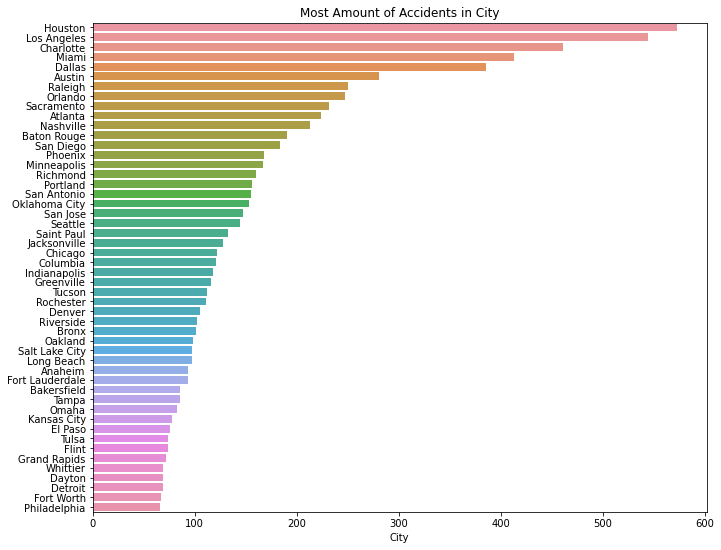

In [144]:
plt.figure(figsize=(11,9))
plt.title("Most Amount of Accidents in City")
sns.barplot(y = city.head(50).index,x = city.head(50));

**Conclusion**:- From this above graph we can conclude that Houston city has the most Amount of Accidents

# **Identify if there was any time of the year or day that had more repoted accidents.**

In [145]:
df.head(1)

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,start_Day,start_Month,start_Year,start_hour,End_Day,End_Month,End_Year,Weather_Timestamp_Day,Weather_Timestamp_Month,Weather_Timestamp_Year
0,2.0,2019-05-21 08:29:00,2019-05-21 09:29:00,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,NaN,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,21.0,5.0,2019.0,8.0,21.0,5.0,2019.0,21.0,5.0,2019.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


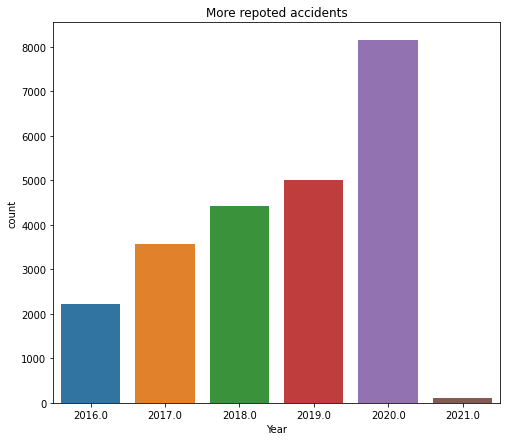

In [146]:
plt.figure(figsize=(8,7))
sns.countplot(df["start_Year"])
plt.xlabel("Year") # x axis label
plt.title("More repoted accidents")
plt.show()

**Conclusion**:- Considering Year we can see that More repoted accidents were happen in 2020

# **Other Factors that predict what effect it migth have had on the number of accidents.**

In [147]:
#Predicting number of accidents using Sunrise_Sunset feature

df["Sunrise_Sunset"].value_counts()

Day               15905
Night              7728
Sunrise_Sunset        3
Name: Sunrise_Sunset, dtype: int64

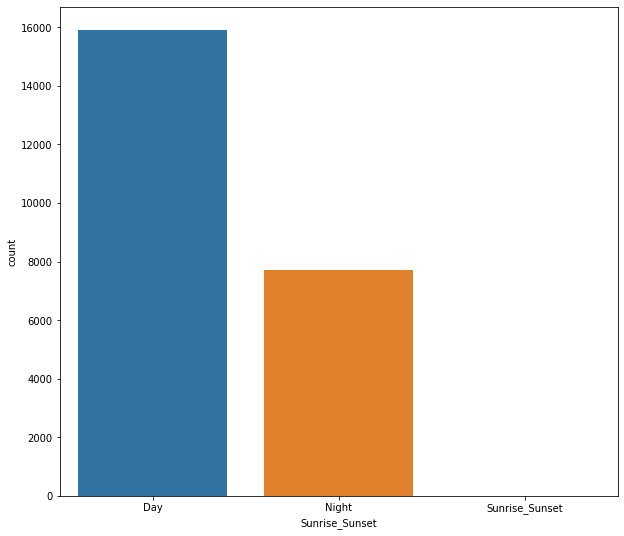

In [148]:
plt.figure(figsize=(10,9))
sns.countplot(x=df["Sunrise_Sunset"])

**Conclusion**:- Considering Sunrise_Sunset feature we can conclude that most of the accident happen during day time

In [149]:
df["Visibility(mi)"].value_counts()

10.00    18388
7.00       699
9.00       643
8.00       486
5.00       458
6.00       452
4.00       355
2.00       347
3.00       333
1.00       265
2.50       101
0.50        94
0.20        68
1.50        61
0.25        58
0.80        44
1.20        43
0.75        38
1.80        34
30.00       17
0.00        16
15.00       15
13.00       14
20.00       13
50.00       11
40.00        8
0.10         7
0.12         3
25.00        3
0.38         2
12.00        2
45.00        2
11.00        2
60.00        2
0.19         1
1.10         1
80.00        1
10.50        1
1.60         1
70.00        1
75.00        1
2.80         1
0.06         1
35.00        1
Name: Visibility(mi), dtype: int64

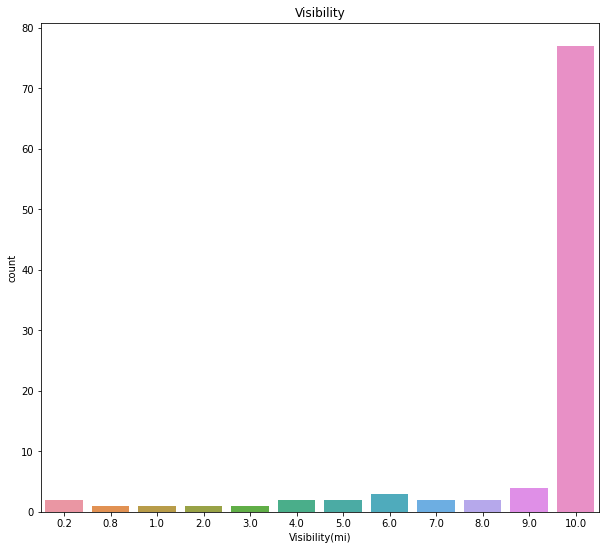

In [150]:
#Predicting number of accidents using Visibility(mi) feature
plt.figure(figsize=(10,9))
sns.countplot(x=df["Visibility(mi)"].head(100))
plt.title("Visibility")
plt.show()


**Conclusion**:- Considering Visibility(mi) feature we can conclude that most of the accident happen when Visibility is 10

In [151]:
df["Weather_Condition"].value_counts()

Fair                            5545
Clear                           3992
Mostly Cloudy                   3185
Partly Cloudy                   2213
Cloudy                          2026
Overcast                        1946
Light Rain                      1162
Scattered Clouds                1061
Light Snow                       340
Fog                              287
Rain                             286
Haze                             265
Heavy Rain                        96
Light Drizzle                     79
Fair / Windy                      65
Cloudy / Windy                    45
Smoke                             44
Mostly Cloudy / Windy             38
Snow                              35
Partly Cloudy / Windy             28
Light Thunderstorms and Rain      25
Thunder in the Vicinity           24
T-Storm                           22
Light Rain / Windy                22
Light Rain with Thunder           21
Thunderstorm                      20
Drizzle                           19
H

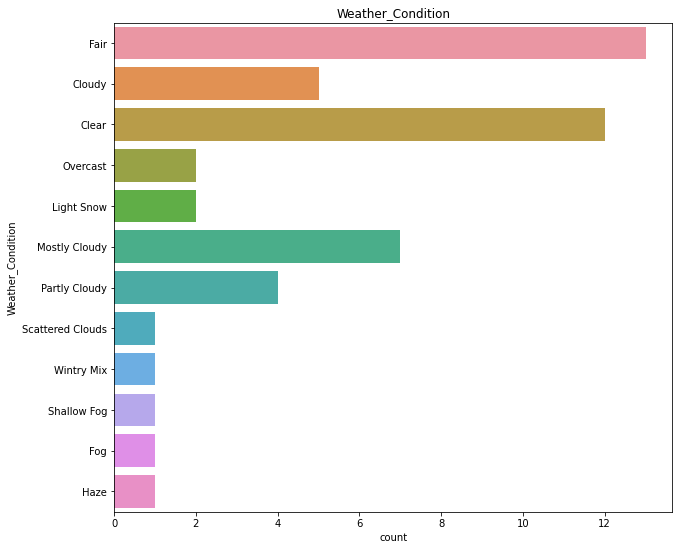

In [152]:
#Predicting number of accidents using Weather_Condition feature
plt.figure(figsize=(10,9))
sns.countplot(y=df["Weather_Condition"].head(50))
plt.title("Weather_Condition")
plt.show()